In [1]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
import pandas as pd
import numpy as np
from seaborn import heatmap
import matplotlib.pyplot as plt
from sysquant.estimators.diversification_multipliers import diversification_mult_single_period
from sysquant.optimisation.weights import portfolioWeights
from syslogdiag.log_to_screen import logtoscreen
from syscore.fileutils import get_filename_for_package

log = logtoscreen('csvFuturesSimData')
log.set_logging_level('close eye')
# data = csvFuturesSimData()
data =  csvFuturesSimData(csv_data_paths=dict(
            csvFuturesAdjustedPricesData='ctse.data.adjusted_prices_csv',
            csvFuturesMultiplePricesData='ctse.data.multiple_prices_csv',
            csvFuturesInstrumentData='ctse.data.csvconfig'
    ), log=log)
system = simplesystem(
    data,
    'paper.systems.china.yaml')

2022-11-20 17:50:45 {'type': 'base_system'}  Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2022-11-20 17:50:45 {'type': 'base_system'}  Following instruments are marked as 'ignore_instruments': not included: ['EXAMPLE']
2022-11-20 17:50:45 {'type': 'base_system'}  Following instruments removed entirely from sim: ['Another_thing', 'EXAMPLE', 'bad_thing']
2022-11-20 17:50:45 {'type': 'base_system', 'stage': 'rawdata', 'instrument_code': 'AG'}  Calculating daily prices for AG
2022-11-20 17:50:46 {'type': 'base_system', 'stage': 'rawdata', 'instrument_code': 'AL'}  Calculating daily prices for AL
2022-11-20 17:50:46 {'type': 'base_system', 'stage': 'rawdata', 'instrument_code': 'AP'}  Calculating daily prices for AP
2022-11-20 17:50:47 {'type': 'base_system', 'stage': 'rawdata', 'instrument_code': 'BU'}  Calculating daily prices for BU
2022-11-20 17:50:47 {'type': 'base_system', 'stage': 'rawdata', 'instrument_code': 'C'}  Calculating daily prices for C
2022

<AxesSubplot: >

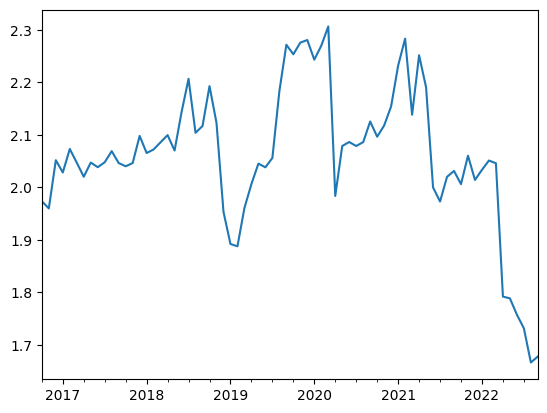

In [2]:


date = pd.Timestamp('2022-09-01')
dates = [date - pd.DateOffset(months=i) for i in range(12 * 6)]
idms = []
for date in dates:
    correlation_matrix = system.portfolio.get_correlation_matrix(relevant_date=date)
    idm = diversification_mult_single_period(correlation_matrix, portfolioWeights.all_one_value(correlation_matrix.list_of_keys(), 1 / len(correlation_matrix.list_of_keys())))
    idms.append(idm)
    # fig, ax = plt.subplots(figsize=(10,3))
    # heatmap(correlation_matrix.as_pd(), ax=ax)
    # plt.show()
pd.Series(idms, index=dates).plot()

In [3]:
system.accounts.portfolio().rolling_ann_std(window=40).tail(6 * 250).plot()

2022-11-20 17:50:58 {'type': 'base_system', 'stage': 'accounts'}  Calculating pandl for portfolio
2022-11-20 17:50:58 {'type': 'base_system', 'stage': 'positionSize'}  Getting vol target
2022-11-20 17:50:58 {'type': 'base_system', 'stage': 'accounts', 'instrument_code': 'AG'}  Calculating pandl for instrument for AG
2022-11-20 17:50:58 {'type': 'base_system', 'stage': 'portfolio', 'instrument_code': 'AG'}  Calculating notional position for AG
2022-11-20 17:50:58 {'type': 'base_system', 'stage': 'portfolio'}  Calculating instrument weights
2022-11-20 17:50:58 {'type': 'base_system', 'stage': 'portfolio'}  Calculating raw instrument weights
2022-11-20 17:50:58 {'type': 'base_system'}  Following instruments are 'duplicate_markets' ['Another_thing', 'bad_thing'] 
2022-11-20 17:50:58 {'type': 'base_system'}  Following instruments are marked as 'ignore_instruments': not included: ['EXAMPLE']
2022-11-20 17:50:58 {'type': 'base_system'}  Following instruments are marked as 'bad_markets':  ['BA

rollParametersMissing: Don't have parameters for AG

In [4]:
n_2_idms = {}
for N in range(2, 36):
    for _ in range(10):
        inss = pd.Series(data.get_instrument_list()).sample(N)

        system = simplesystem(
            data,
            'paper.systems.china.yaml', log_level='close eye')
        system.config.instrument_weights = {ins:1/len(inss) for ins in inss}
        prices = [system.data.daily_prices(instrument_code).rename(instrument_code) for instrument_code in system.get_instrument_list()]
        prices = pd.concat(prices, axis=1).dropna()

        dates = prices.sample(24 * 7).index
        idms = []
        for date in dates:
            correlation_matrix = system.portfolio.get_correlation_matrix(relevant_date=date)
            weights = pd.Series([1, 2, 3, 4]).sample(len(correlation_matrix.list_of_keys()), replace=True)
            weights = weights / weights.sum()
            weights = weights.to_list()
            print(weights)
            weights = portfolioWeights.all_one_value(correlation_matrix.list_of_keys(), weights)
            
            idm = diversification_mult_single_period(correlation_matrix, weights, dm_max=5)
            idms.append(idm)
        df = pd.DataFrame({
                'date': dates,
                'idm': idms
            })
        if N not in n_2_idms:
            n_2_idms[N] = df
        else:
            n_2_idms[N] = pd.concat([n_2_idms[N], df])

Private configuration private/private_config.yaml does not exist; no problem if running in sim mode
 [================================================================================] 100.0% Estimating correlations (0.0/2.5/2.5 secs left/elapsed/total)                                                                               
[0.6666666666666666, 0.3333333333333333]
[0.5, 0.5]
[0.6666666666666666, 0.3333333333333333]
[0.8, 0.2]
[0.75, 0.25]
[0.5714285714285714, 0.42857142857142855]
[0.5, 0.5]
[0.42857142857142855, 0.5714285714285714]
[0.5, 0.5]
[0.6, 0.4]
[0.3333333333333333, 0.6666666666666666]
[0.2, 0.8]
[0.6, 0.4]
[0.6666666666666666, 0.3333333333333333]
[0.42857142857142855, 0.5714285714285714]
[0.5, 0.5]
[0.5, 0.5]
[0.5714285714285714, 0.42857142857142855]
[0.25, 0.75]
[0.5, 0.5]
[0.5, 0.5]
[0.6666666666666666, 0.3333333333333333]
[0.4, 0.6]
[0.5, 0.5]
[0.2, 0.8]
[0.5, 0.5]
[0.8, 0.2]
[0.5, 0.5]
[0.25, 0.75]
[0.4, 0.6]
[0.5, 0.5]
[0.25, 0.75]
[0.75, 0.25]
[0.4, 0.6]
[0.5, 0.5]

<AxesSubplot:xlabel='N', ylabel='idm'>

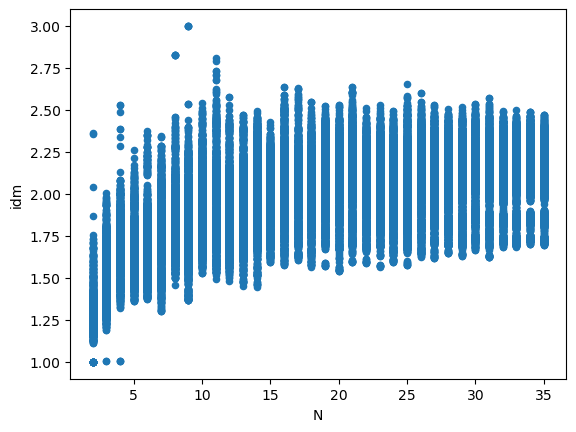

In [2]:
csv = pd.read_csv(get_filename_for_package('paper.topic.diversify.True-weights.csv'))
csv.plot.scatter(x='N', y='idm')

<AxesSubplot:xlabel='N', ylabel='idm'>

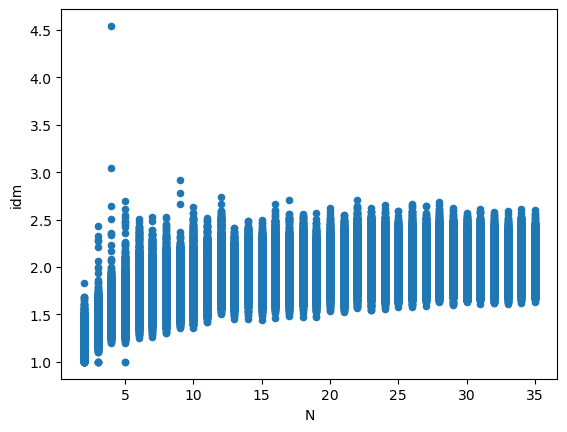

In [6]:
csv = pd.read_csv(get_filename_for_package('paper.topic.diversify.random-weights.csv'))
csv.plot.scatter(x='N', y='idm')